### Multi Linear Regression

In [793]:
dataset = pd.read_excel('Notes/Datasets/RegressionExample.xlsx',sheet_name=1)
dataset

,EducLev,YrHired,Gender,Salary
0,3,92,1,3200.0
1,1,81,0,3910.0
2,1,83,0,3320.0
3,2,87,0,3060.0
4,3,92,1,2900.0
...,...,...,...,...
203,3,61,1,9500.0
204,5,59,1,9700.0
205,5,63,1,8800.0
206,5,60,1,9400.0


In [799]:
X = dataset.drop('Salary', axis =1 )
y = dataset['Salary']

In [800]:
import statsmodels.api as sm

In [801]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
# Directly using an API

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     116.3
Date:                Thu, 04 May 2023   Prob (F-statistic):           6.06e-44
Time:                        03:14:03   Log-Likelihood:                -1652.3
No. Observations:                 208   AIC:                             3313.
Df Residuals:                     204   BIC:                             3326.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.163e+04    590.602     19.684      0.0

In [802]:
#from imported model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [803]:
#printing parameters:
print(regressor.intercept_)
print(regressor.coef_)

11625.563257025859
[ 309.38258828 -102.62555945  446.95457475]


In [805]:
#making predictions:
y_pred = regressor.predict(X)
# The coefficients
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: %.2f'
      % r2_score(y, y_pred))

Mean squared error: 465131.97
R^2 Score: 0.63


### SVM

In [14]:
from sklearn.datasets import make_blobs
%matplotlib inline

In [514]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

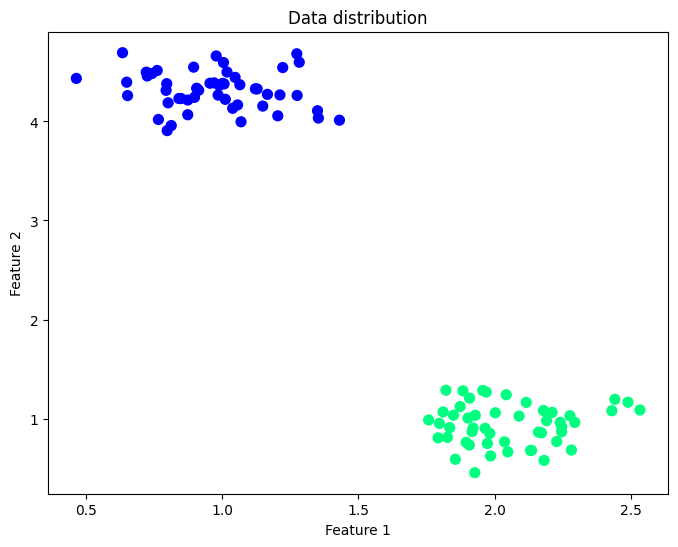

In [244]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.20)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plt.title("Data distribution")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [220]:
model=SVC(C=0.1,kernel="rbf",)

In [221]:
model.fit(X,y)

SVC(C=0.1)

In [222]:
pred=model.predict(X)

In [223]:
confusion_matrix(pred,y)

array([[50,  0],
       [ 0, 50]], dtype=int64)

In [224]:
# ?model

In [225]:
model.support_vectors_ 

array([[0.79871293, 3.90762803],
       [1.06940257, 3.99653859],
       [1.20415022, 4.05682216],
       [0.76655949, 4.01978374],
       [1.28282592, 4.59765908],
       [0.63501604, 4.69394241],
       [1.27392052, 4.68296516],
       [1.430221  , 4.01291419],
       [1.35290022, 4.03423552],
       [1.34978168, 4.10833175],
       [0.81364082, 3.95853081],
       [0.46567212, 4.43451105],
       [2.48791471, 1.16496925],
       [2.43985593, 1.19376662],
       [2.53189648, 1.08655956],
       [1.90735492, 1.20626658],
       [1.96823681, 1.26751641],
       [2.0416192 , 1.2403322 ],
       [1.757016  , 0.985542  ],
       [1.82064284, 1.2863879 ],
       [2.18031381, 0.57725213],
       [1.95566103, 1.28357007],
       [1.88302238, 1.27967665],
       [1.85522445, 0.58870944],
       [1.92654384, 0.45298303]])

In [226]:
model.support_

array([ 3,  5, 38, 40, 41, 42, 52, 54, 56, 67, 74, 95,  0,  7, 15, 22, 34,
       37, 39, 44, 59, 65, 80, 93, 96])

In [239]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

def plot_svm_decision_boundary(X, y, kernel='linear', C=1.0):
    """
    Plot the decision boundary and margin lines for a support vector machine (SVM).
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        The input data.
    y : array-like, shape (n_samples,)
        The target values.
    kernel : string, optional (default='linear')
        Specifies the kernel type to be used in the algorithm.
        Options are 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'.
    C : float, optional (default=1.0)
        Penalty parameter C of the error term.
    
    Returns
    -------
    None
    
    """
    # fit the SVM classifier
    clf = svm.SVC(kernel=kernel,degree=1, C=C)
    clf.fit(X, y)

    # create a mesh of points to plot the decision boundary and margin lines
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the decision boundary and margin lines
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')

    # plot the margin lines
    x_min = X[:, 0].min() - 1
    x_max = X[:, 0].max() + 1
    w = clf.dual_coef_ [0]
    a = -w[0] / w[1]
    xx = np.linspace(x_min, x_max)
    yy = a * xx - (clf.intercept_[0]) / w[1]
#     plt.plot(xx, yy, 'k--', label='Margin Line')

    # plot the support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.legend()
    plt.show()


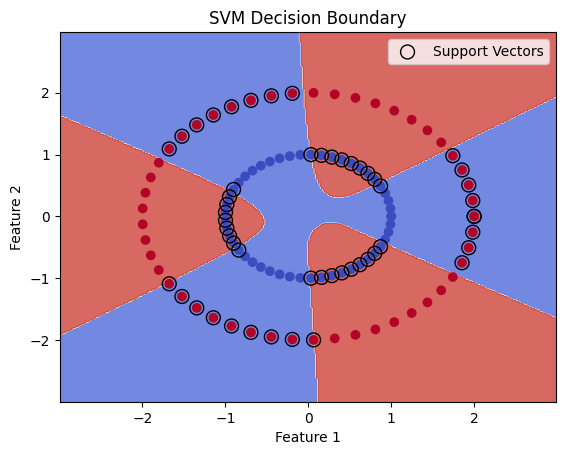

In [242]:
plot_svm_decision_boundary(X,y,kernel="sigmoid",C=10)

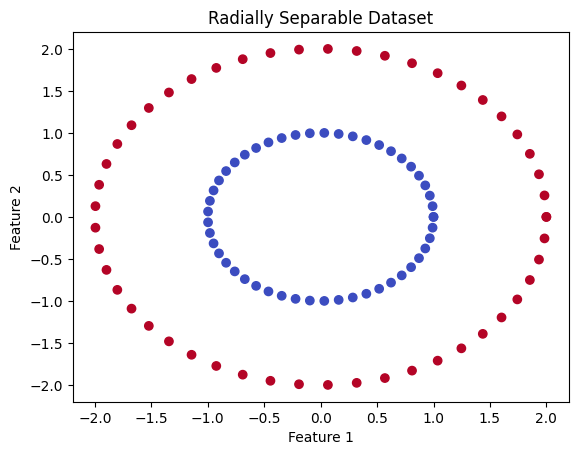

In [230]:
import numpy as np
import matplotlib.pyplot as plt

# set the number of samples and the radius of the inner and outer circles
n_samples = 100
inner_radius = 1
outer_radius = 2

# create the inner and outer circles
inner_circ_x = inner_radius * np.cos(np.linspace(0, 2*np.pi, n_samples//2))
inner_circ_y = inner_radius * np.sin(np.linspace(0, 2*np.pi, n_samples//2))
outer_circ_x = outer_radius * np.cos(np.linspace(0, 2*np.pi, n_samples//2))
outer_circ_y = outer_radius * np.sin(np.linspace(0, 2*np.pi, n_samples//2))

# combine the circles to create the dataset
X = np.vstack((np.hstack((inner_circ_x[:, np.newaxis], inner_circ_y[:, np.newaxis])),
               np.hstack((outer_circ_x[:, np.newaxis], outer_circ_y[:, np.newaxis]))))
y = np.hstack((np.zeros(n_samples//2), np.ones(n_samples//2)))

# plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Radially Separable Dataset')
plt.show()

### KNN

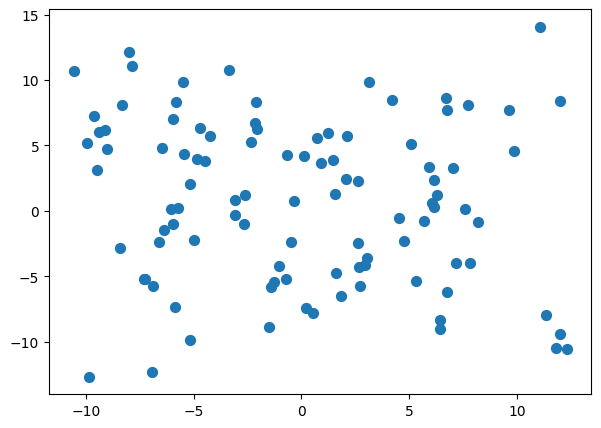

In [272]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=100, centers=100,
                       cluster_std=2)
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], s=50);

In [275]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, max_iter=1)
kmeans.fit(X)
labels = kmeans.predict(X)
print(labels)

[ 5 10 11  3 11 12  7  0  1 13  9  1  6  5  3  7  5  3  5  4  2  2  5  7
  8  8  4  5  5  8  9 13 15  5  1  7  1  6  3  8 10  9  2  7  5 18  0 19
 11  6 17 10 18 18  7  1  3  6  9  6 17  4  7 11 14  4 13  0  3 18 16 11
 14  5 10 15  6  0 19 12 18 19  9 19 10  6  1  2 10  0  8  8 15 12  2  0
  7  9 17 17]


In [276]:
#Accuracy metrics:
# Calculate Silhoutte Score
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)
# Higher the better!

Silhouetter Score: 0.405


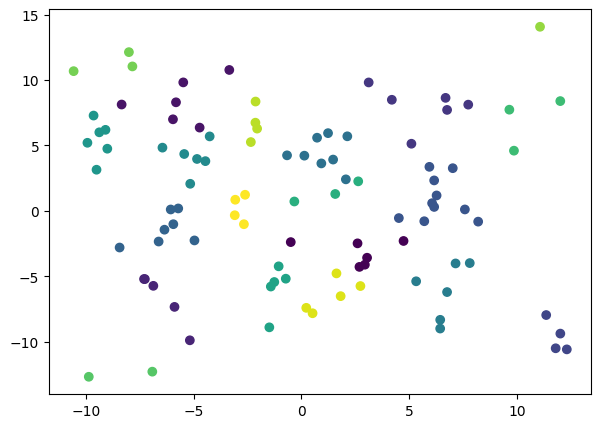

In [277]:
plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

In [278]:
print(kmeans.inertia_)
print(kmeans.cluster_centers_)

274.8405602125789
[[  2.58413015  -3.19362607]
 [ -5.61356446   8.39818263]
 [ -6.50182304  -6.6803675 ]
 [  6.17420641   7.95070608]
 [ 11.8636239   -9.61249789]
 [  6.35682211   0.8958131 ]
 [ -6.30151523  -1.36909485]
 [  1.17996381   4.21257007]
 [  6.64842801  -6.1564675 ]
 [ -5.10200724   4.11832427]
 [ -9.42637593   5.43099728]
 [ -1.19264655  -5.91259433]
 [  0.61699832   1.00272267]
 [ 10.9296456    6.49684817]
 [ -8.39290122 -12.49073208]
 [ -8.8059218   11.28685654]
 [ 11.06456463  14.07410209]
 [ -2.16881925   6.66190664]
 [  1.3813795   -6.45944321]
 [ -2.8636859    0.18098789]]


In [279]:
#Deciding Optimal Number of CLusters:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
sse,db,score = {}, {},{}
for k in range(2, 100):
    kmeans = KMeans(n_clusters=k, max_iter=10000000,random_state=10).fit(X)
    labels=kmeans.predict(X)
    sse[k] = kmeans.inertia_ 
    score[k] = silhouette_score(X, labels, metric='euclidean')
    # Inertia: Sum of squared distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(X,labels)

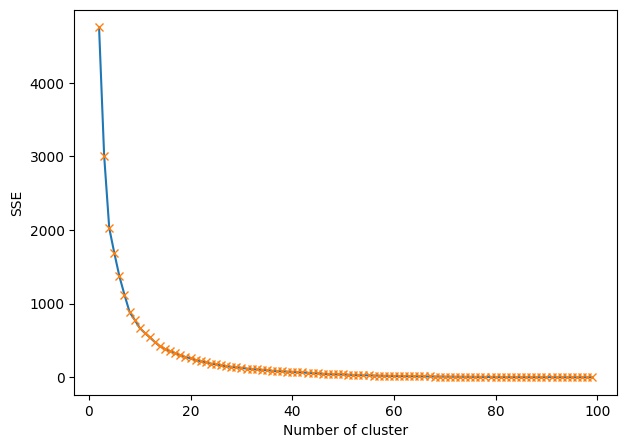

In [280]:
#Elbow Method
plt.figure(figsize=(7,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.plot(list(sse.keys()), list(sse.values()),"x")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

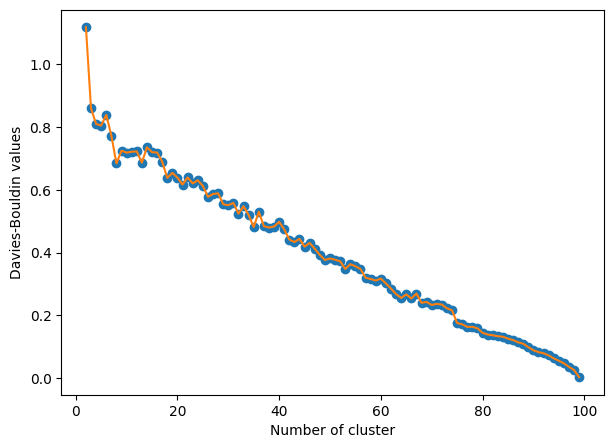

In [281]:
#Davis-Boldin index
plt.figure(figsize=(7,5))
plt.plot(list(db.keys()), list(db.values()), 'o')
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

In [282]:
# A lower Davies-Bouldin values score indicates better cluster separation and 
# A higher Davies-Bouldin values score suggests that the clusters are less well-separated.

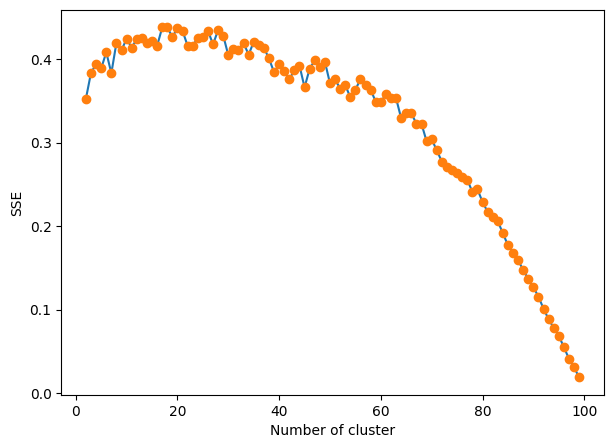

In [283]:
plt.figure(figsize=(7,5))
plt.plot(list(score.keys()), list(score.values()))
plt.plot(list(score.keys()), list(score.values()),"o")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### GMM

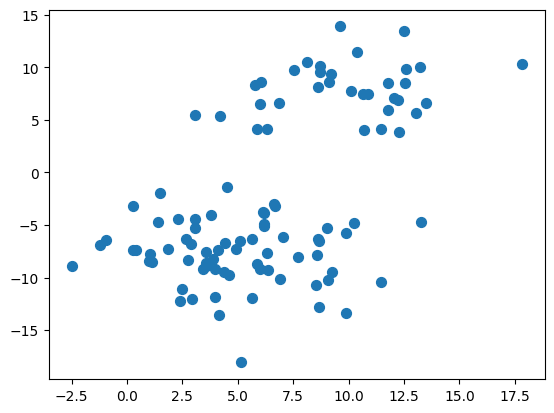

In [362]:
X, y = make_blobs(n_samples=100, centers=3,
                  random_state=45536, cluster_std=3)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [363]:
?make_blobs

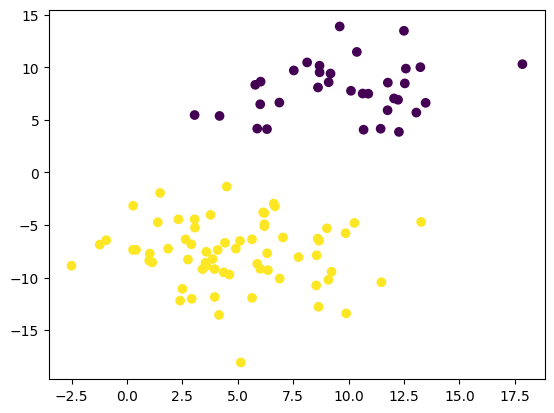

In [364]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.show()

In [365]:
gmm.means_

array([[ 9.79968484,  7.87546363],
       [ 4.85507867, -7.68489538]])

In [366]:
gmm.covariances_

array([[[ 9.54744925,  1.73936286],
        [ 1.73936286,  6.395031  ]],

       [[10.21949434, -0.64861388],
        [-0.64861388,  9.29954887]]])

In [367]:
gmm.weights_

array([0.33996142, 0.66003858])

In [368]:
#Predicting probability:
probs = gmm.predict_proba(X)
probs[0,:]
probs = probs.round(3)
print(probs)

[[0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.997 0.003]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.998 0.002]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.999 0.001]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.

In [369]:
#VIsualization Ellipse:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [370]:
#  To get the centers of the each cluster,
import scipy
gmm = GaussianMixture(n_components=2)
out=gmm.fit(X)
centers = np.empty(shape=(out.n_components, X.shape[1]))
#finding the cemter of each cluster
for i in range(out.n_components):
    density = scipy.stats.multivariate_normal(cov=out.covariances_[i], mean=out.means_[i]).logpdf(X)
    centers[i, :] = X[np.argmax(density)]
centers=centers.astype(int)
print("Center of clusters: \n",centers)

Center of clusters: 
 [[ 4 -7]
 [10  7]]


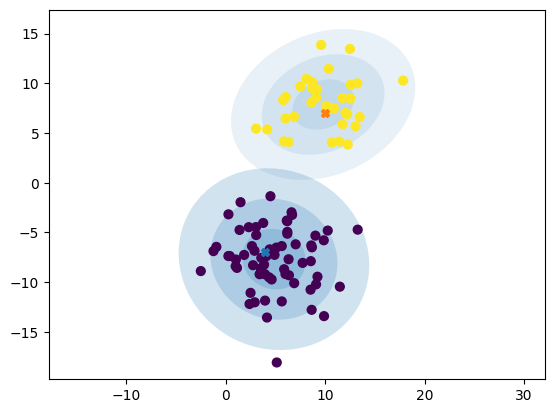

In [371]:
# For creating some circles around the center of each cluster within the visualizations
from scipy.spatial.distance import cdist
# For creating some circles for probability area around the center of each cluster within the visualizations
from matplotlib.patches import Ellipse
# gmm = GaussianMixture(n_components=4)
plot_gmm(gmm, X)
for i in range(2):
    plt.plot(centers[i][0],centers[i][1],'X')
plt.show()

In [372]:
#AIC and BIC for determining Optimal K:
Sum_bic = []
Sum_aic = []

K = range(1,8)
for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm = gmm.fit(X)
    Sum_bic.append(gmm.bic(X))
    Sum_aic.append(gmm.aic(X))

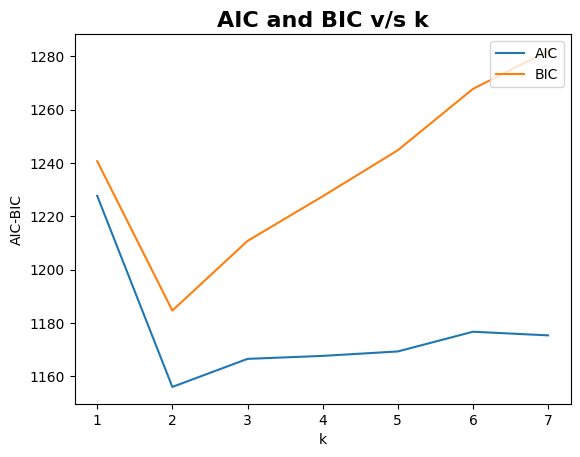

In [373]:
x1 = K
y1 = Sum_aic
plt.plot(x1, y1, label = "AIC")
x2 = K
y2 = Sum_bic
plt.plot(x2, y2, label = "BIC")

plt.title("AIC and BIC v/s k", fontsize=16, fontweight='bold')
plt.xlabel("k")
plt.ylabel("AIC-BIC")
plt.legend(loc='upper right')
plt.show()

In [345]:
# lower is better

In [380]:
from scipy.stats import norm
norm.cdf(1)

0.8413447460685429

### Precision and Recall

In [590]:
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score, confusion_matrix, recall_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(90)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print(confusion_matrix(y_true,y_pred))

Recall: 0.900
Precision: 0.750
[[9970   30]
 [  10   90]]


In [591]:
#Confusion Matrix:
from sklearn.metrics import confusion_matrix
y_true = [0, 0, 2, 2, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 2]
y_pred = [0, 0, 2, 2, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 1, 2]
confusion_matrix(y_true, y_pred)

array([[5, 1, 0],
       [2, 3, 1],
       [0, 0, 4]], dtype=int64)

In [592]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.71      0.83      0.77         6
     class 1       0.75      0.50      0.60         6
     class 2       0.80      1.00      0.89         4

    accuracy                           0.75        16
   macro avg       0.75      0.78      0.75        16
weighted avg       0.75      0.75      0.74        16



### Decomposing a Matrix

In [384]:
import numpy as np
A = np.array([[5,4,3],[4,7,2],[3,2,7]])
A

array([[5, 4, 3],
       [4, 7, 2],
       [3, 2, 7]])

In [385]:
# Computing the eigen values and Eigen Vectors
eval, evec = np.linalg.eig(A)

In [387]:
# Columns of evec are the eigen vectors
vec1=np.array(evec[:,0])
vec2=np.array(evec[:,1])
vec3=np.array(evec[:,2])

In [388]:
# Approximating The original matrix from these eigen values and Eigen vectors
# M = L1V1V1' + L2V2V2' + ....
mat1 = eval[0]*np.dot(vec1[:,None],vec1[None,:])
mat2 = eval[1]*np.dot(vec2[:,None],vec2[None,:])
mat3 = eval[2]*np.dot(vec3[:,None],vec3[None,:])

In [392]:
M=mat1+mat2+mat3
M

array([[5., 4., 3.],
       [4., 7., 2.],
       [3., 2., 7.]])

### PCA

In [399]:
# Toy dataset
Y = [[8,4,9,1,5],
[9,6,9,5,5],
[10,8,9,7,5],
[10,5,9,6,5],
[5,4,9,2,5],
[2,7,9,9,5],
[7,5,9,8,6],
[3,4,9,8,5],
[4,2,9,7,5],
[1,4,9,10,5]]
columnnames = ['Location','City','Society','Ambience','Vicinity to Airport']
rownames = ['House 1','House 2','House 3','House 4','House 5','House 6','House 7','House 8','House 9','House 10']

In [420]:
# Converting them into dataframe using pandas
import pandas as pd
Y = pd.DataFrame(Y, columns = columnnames, index=rownames)
Y

,Location,City,Society,Ambience,Vicinity to Airport
House 1,8,4,9,1,5
House 2,9,6,9,5,5
House 3,10,8,9,7,5
House 4,10,5,9,6,5
House 5,5,4,9,2,5
House 6,2,7,9,9,5
House 7,7,5,9,8,6
House 8,3,4,9,8,5
House 9,4,2,9,7,5
House 10,1,4,9,10,5


In [436]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
results = pca.fit(Y)

In [437]:
# These are the directions in which the data will be projected to get the transformeedd dataset
print(results.components_)
#one can notice that for third feature, the contribution of 'Society' feature is zero in all three eigenvectors because it has no contribution
#Also, for the 'fifth' feature, i.e. 'Vicinity to airport', the contribution is less because there is very less variance in the data for that feature

[[-8.08043525e-01 -1.05099654e-01  0.00000000e+00  5.79671724e-01
   6.46182619e-04]
 [-4.50728592e-01 -5.22540662e-01  1.11022302e-16 -7.23006030e-01
  -3.25157301e-02]
 [-3.77102721e-01  8.44981400e-01 -2.22044605e-16 -3.72386432e-01
  -7.16122688e-02]]


In [465]:
Y_transformed = results.transform(Y)
Y_transformed
# This the matrix after projections taken to smaller dimention

array([[-4.67462647,  3.35894009,  0.42841034],
       [-3.37418241, -1.02889395,  0.25172469],
       [-3.23308179, -3.97071593,  0.81981191],
       [-3.49745455, -1.68008791, -1.34274586],
       [-1.67082417,  3.98811983,  1.18733207],
       [ 4.49570951, -1.28835859,  2.24687941],
       [ 0.08666565, -1.80642993, -1.02782283],
       [ 3.42329322,  0.55154083, -0.29278108],
       [ 2.24577728,  1.8688996 , -1.98746016],
       [ 6.19872372,  0.00698596, -0.2833485 ]])

In [448]:
results.explained_variance_ # how much each component of PCA captures the varience

array([14.90216021,  6.17284113,  1.59473423])

In [466]:
# TO DO PCA From Sctarch, you need to calc the mean centered Matix first,
# then find the Covarience matrix and then find thr eigen vector of the matrix
from mlxtend.preprocessing import MeanCenterer
mc = MeanCenterer().fit(Y)
Y_mean_centered=mc.transform(Y)

In [467]:
Y_T_Y=np.dot(Y_mean_centered.transpose(),Y_mean_centered)
eigrnVal,evec=np.linalg.eig(Y_T_Y)

In [458]:
Y_T_Y

array([[ 1.009e+02,  1.990e+01,  0.000e+00, -4.270e+01,  1.100e+00],
       [ 1.990e+01,  2.690e+01,  0.000e+00,  8.300e+00,  1.000e-01],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
       [-4.270e+01,  8.300e+00,  0.000e+00,  7.610e+01,  1.700e+00],
       [ 1.100e+00,  1.000e-01,  0.000e+00,  1.700e+00,  9.000e-01]])

In [468]:
evec # columns are the eigen vectors

array([[-8.08043525e-01, -4.50728592e-01,  3.77102721e-01,
         4.12666429e-02,  0.00000000e+00],
       [-1.05099654e-01, -5.22540662e-01, -8.44981400e-01,
        -4.37236046e-02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 5.79671724e-01, -7.23006030e-01,  3.72386432e-01,
         5.07081639e-02,  0.00000000e+00],
       [ 6.46182619e-04, -3.25157301e-02,  7.16122688e-02,
        -9.96902198e-01,  0.00000000e+00]])

In [469]:
print(results.components_) # they are matchin from the inbuilt PCA function's eigen values

[[-8.08043525e-01 -1.05099654e-01  0.00000000e+00  5.79671724e-01
   6.46182619e-04]
 [-4.50728592e-01 -5.22540662e-01  1.11022302e-16 -7.23006030e-01
  -3.25157301e-02]
 [-3.77102721e-01  8.44981400e-01 -2.22044605e-16 -3.72386432e-01
  -7.16122688e-02]]


In [473]:
# To get Back the Orignal Matrix approximation from the transformed Matrix Y_transformed
original = results.inverse_transform(Y_transformed)
np.round(original,2)

array([[8.  , 4.  , 9.  , 1.  , 4.96],
       [9.  , 6.  , 9.  , 4.99, 5.11],
       [9.99, 8.01, 9.  , 6.99, 5.17],
       [9.99, 5.01, 9.  , 5.99, 5.25],
       [5.  , 3.99, 9.  , 2.01, 4.88],
       [2.  , 7.  , 9.  , 9.  , 4.98],
       [7.03, 4.97, 9.  , 8.04, 5.23],
       [3.  , 4.  , 9.  , 7.99, 5.11],
       [3.99, 2.01, 9.  , 6.99, 5.18],
       [0.99, 4.01, 9.  , 9.99, 5.12]])

Text(0, 0.5, 'cumulative explained variance')

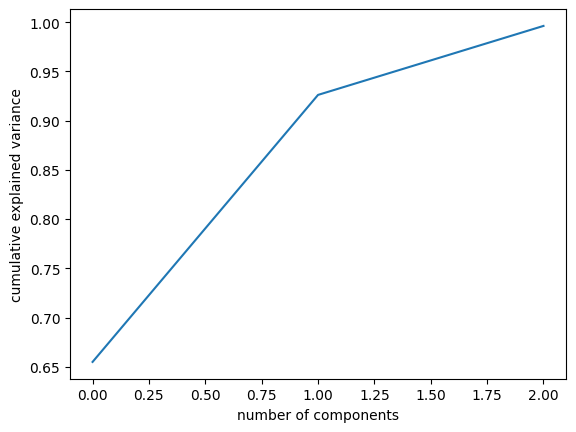

In [510]:
plt.plot(np.cumsum(results.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### Singular Value Decomposition (SVD)

In [474]:
# M = U.S.VT
B = np.array([[2,3,4],[1,5,0]])
B

array([[2, 3, 4],
       [1, 5, 0]])

In [477]:
# Evaluating Tranpose
BT=B.T
BT

array([[2, 1],
       [3, 5],
       [4, 0]])

In [500]:
# We define BT_B and B_BT
BT_B = BT@B
B_BT = B@BT

In [501]:
# Calculation of U
eval1, evec1 = np.linalg.eig(B_BT)
print(evec1) #  U
print(eval1)

[[ 0.73752756 -0.67531703]
 [ 0.67531703  0.73752756]]
[44.56604817 10.43395183]


In [502]:
# Calculation of V
eval2, evec2 = np.linalg.eig(BT_B)
print(evec2) #  V
print(eval2)

[[ 0.32211546  0.92747779  0.18980669]
 [ 0.83723059 -0.18549556 -0.51442816]
 [ 0.4419124  -0.32461723  0.83626377]]
[4.45660482e+01 7.21644966e-16 1.04339518e+01]


In [503]:
evec2[:,[1,2]]=-evec2[:,[2,1]]
evec2 # Arranging the columns in a decreasing eigen value order

array([[ 0.32211546, -0.18980669, -0.92747779],
       [ 0.83723059,  0.51442816,  0.18549556],
       [ 0.4419124 , -0.83626377,  0.32461723]])

In [504]:
# Calculation for S
sigma = np.array([[eval1[0]**0.5,0,0],[0,eval1[1]**0.5,0]])
sigma

array([[6.67578072, 0.        , 0.        ],
       [0.        , 3.23016282, 0.        ]])

In [505]:
# Restroing the original Matrix
np.round(evec1 @ sigma @ evec2.T,decimals = 3)

array([[ 2.,  3.,  4.],
       [ 1.,  5., -0.]])

In [506]:
# appoximation by each vecotrs:
vec11=np.array(evec1[:,0])
vec12=np.array(evec2[:,0])
matr1 = (eval1[0]**0.5)*np.dot(vec11[:,None],vec12[None,:])

vec21=np.array(evec1[:,1])
vec22=np.array(evec2[:,1])
matr2 = (eval1[1]**0.5)*np.dot(vec21[:,None],vec22[None,:])

In [507]:
np.round(matr1+matr2)

array([[ 2.,  3.,  4.],
       [ 1.,  5., -0.]])

In [508]:
# USING DIRECT SVD FUNCTION OF NUMPY
U, s, V = np.linalg.svd(B) 

In [509]:
S=[[s[0],0,0],[0,s[1],0]]
np.round(U@ S @V,decimals=3) # "@" is used for matris multiplication

array([[ 2.,  3.,  4.],
       [ 1.,  5., -0.]])

### Linear Discriminative Analysis (LDA)

In [511]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [512]:
# Used Iris Dataset and used LDA
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

In [694]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [715]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values
for i in range(len(y)):
    if(y[i]=="Iris-setosa"):
        y[i]=1
    if(y[i]=="Iris-virginica"):
        y[i]=2
    if(y[i]=="Iris-versicolor"):
        y[i]=0
y=np.array(y)
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [716]:
from sklearn.preprocessing import StandardScaler
# Scaling the input
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [717]:
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

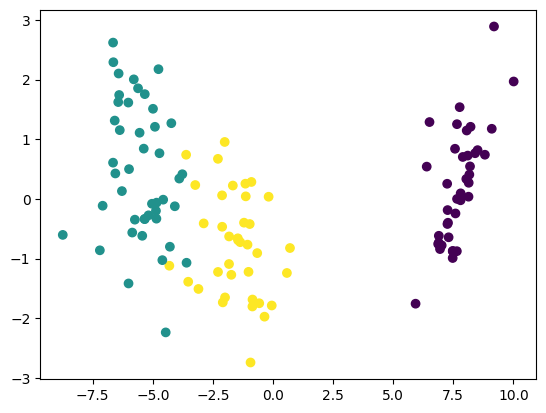

In [718]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [719]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=2323)
results = pca.fit(X_train)
x_train_pca=results.transform(X_train)

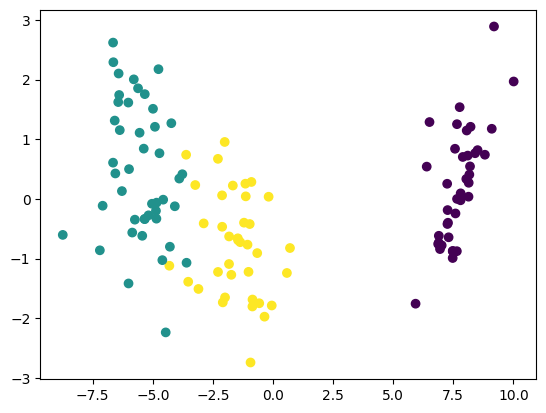

In [720]:
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train)

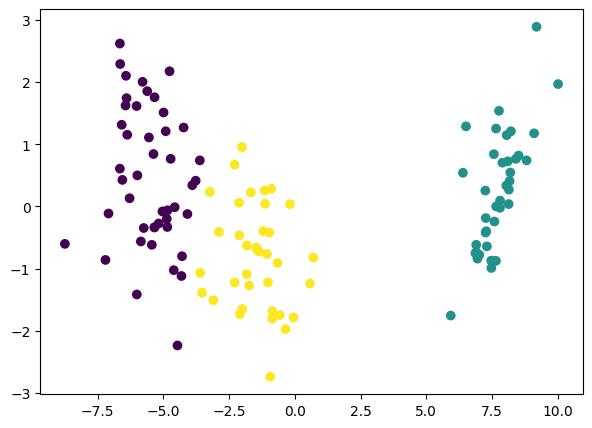

In [721]:
kmeans = KMeans(n_clusters=3, max_iter=10000000)
kmeans.fit(x_train_pca)
labels = kmeans.predict(x_train_pca)
plt.figure(figsize=(7,5))
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=labels)
plt.show()

In [722]:
confusion_matrix(labels,y_train)

array([[ 0, 43,  2],
       [39,  0,  0],
       [ 0,  1, 35]], dtype=int64)

In [581]:
# COINCIDENTLY the PCA and LDA are macthing, but it is NOT necessay!!!

In [582]:
# now you can perform Clustering or any thing after dimentionality reduction

# TEXT ANALYTICS

In [601]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [595]:
txt = "I am not going to? lose in World. Cup World. Cup"
# Tokenization - Extracting smaller parts(tokens) from the text
print(txt.split(" "))
print(txt.split("."))
print(txt.split("?"))
print(txt.lower())

['I', 'am', 'not', 'going', 'to?', 'lose', 'in', 'World.', 'Cup', 'World.', 'Cup']
['I am not going to? lose in World', ' Cup World', ' Cup']
['I am not going to', ' lose in World. Cup World. Cup']
i am not going to? lose in world. cup world. cup


In [604]:
txt = "This hotel is awesome, isn't it? it teacher's phone's couldn't have been a: better place than is not this!!!! #LAMMOO"
print(word_tokenize(txt))

['This', 'hotel', 'is', 'awesome', ',', 'is', "n't", 'it', '?', 'it', 'teacher', "'s", 'phone', "'s", 'could', "n't", 'have', 'been', 'a', ':', 'better', 'place', 'than', 'is', 'not', 'this', '!', '!', '!', '!', '#', 'LAMMOO']


In [597]:
!pip install nltk

  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)



You should consider upgrading via the 'd:\work\mining\mining\scripts\python.exe -m pip install --upgrade pip' command.


In [605]:
from nltk.tokenize import wordpunct_tokenize
print(wordpunct_tokenize(txt))

['This', 'hotel', 'is', 'awesome', ',', 'isn', "'", 't', 'it', '?', 'it', 'teacher', "'", 's', 'phone', "'", 's', 'couldn', "'", 't', 'have', 'been', 'a', ':', 'better', 'place', 'than', 'is', 'not', 'this', '!!!!', '#', 'LAMMOO']


In [610]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
print(tokenizer.tokenize(txt))

['This', 'hotel', 'is', 'awesome', ',', "isn't", 'it', '?', 'it', "teacher's", "phone's", "couldn't", 'have', 'been', 'a', ':', 'better', 'place', 'than', 'is', 'not', 'this', '!', '!', '!', '#LAMMOO']


In [611]:
from nltk.tokenize import regexp_tokenize
message = "Living life king size #chilling #lifegoals #yolo #wanderlust"
# TO Tokenize all the "#" 
regexp_tokenize(message,"#[\w]+")

['#chilling', '#lifegoals', '#yolo', '#wanderlust']

In [615]:
from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")
#stop_nltk = stopwords.words("spanish")
print(stop_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [616]:
from string import punctuation
print(list(punctuation))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [617]:
punct_stop = list(punctuation) + stop_nltk

In [618]:
txt = "i am not able to work today, i will be! taking off : ," 
[word for word in word_tokenize(txt) if word not in punct_stop] # List comprehension

['able', 'work', 'today', 'taking']

### Stemming

- Take a string to its root form
- it is Rule based and chops off the string at the end of the word
- The stemmed word might not be part of the dictionary
- 2 types:
    1. porter stemmer - oldest one originally developed in 1979
    2. snowball stemmer - sophasticated stemmer, supports multiple languages. faster than porter stemmer

In [619]:
from nltk.stem import PorterStemmer, SnowballStemmer

In [689]:
stemmer_p = PorterStemmer()
stemmer_p.stem('driving')
stemmer_p.stem('together')

'togeth'

In [621]:
txt = 'I mustered all my drive, drove to the driving school'
tokens = word_tokenize(txt.lower())
print(tokens)

['i', 'mustered', 'all', 'my', 'drive', ',', 'drove', 'to', 'the', 'driving', 'school']


In [ ]:
text1 = "studies studying cries cry his execute"
text2= "studies studying cries cry his execute orderly university universal"

In [622]:
print([ stemmer_p.stem(word) for word in tokens ])

['i', 'muster', 'all', 'my', 'drive', ',', 'drove', 'to', 'the', 'drive', 'school']


In [623]:
stemmer_s = SnowballStemmer("english")

In [624]:
print([ stemmer_s.stem(word) for word in tokens ])

['i', 'muster', 'all', 'my', 'drive', ',', 'drove', 'to', 'the', 'drive', 'school']


### Lemmetization

- Like stemming, lemmatization takes the word to the root form called as lemma
- It involves resolving words to their dictionary form
- A lemma of a word is its dictionary form or canonical form
- Lemmetizer in NLTK uses WordNet data set which comprises a list of synonyms

In [692]:
nltk.pos_tag(word_tokenize("he is driving and drives the down of the drived vehicle"))

[('he', 'PRP'),
 ('is', 'VBZ'),
 ('driving', 'VBG'),
 ('and', 'CC'),
 ('drives', 'VBZ'),
 ('the', 'DT'),
 ('down', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('drived', 'JJ'),
 ('vehicle', 'NN')]

In [693]:
import emot
text = "very bad phone :) :P :D"
emot_obj = emot.emot() 
emot_obj.emoticons(text)

{'value': [':)', ':P', ':D'],
 'location': [[15, 17], [18, 20], [21, 23]],
 'mean': ['Happy face or smiley',
  'Tongue sticking out, cheeky, playful or blowing a raspberry',
  'Laughing, big grin or laugh with glasses'],
 'flag': True}

In [626]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [632]:
#Lemmetize the below sentenses
txt=["he is very methodical and orderly in his execution","he is driving and drives the down of the drived vehicle","studies studying cries cry likes his execute","studies studying cries cry his likes execute orderly university universal"]

In [633]:
for sen in txt:
    print([lemm.lemmatize(word) for word in word_tokenize(sen.lower()) ])

['he', 'is', 'very', 'methodical', 'and', 'orderly', 'in', 'his', 'execution']
['he', 'is', 'driving', 'and', 'drive', 'the', 'down', 'of', 'the', 'drived', 'vehicle']
['study', 'studying', 'cry', 'cry', 'like', 'his', 'execute']
['study', 'studying', 'cry', 'cry', 'his', 'like', 'execute', 'orderly', 'university', 'universal']


- lemmetize is very aggresive in taking the word to the root form
- if the word to be stemmed is not part of the dictionary, it leaves it as is
- ensures that the meaning of the sentence is not altered
- In most of the scenarios the no. distinct words after lemmetization could be same as before
    - every step in text cleaning helps is reducing the number of words. but lemmetizer might not make a difference 

#### Text cleaning techniques:
1. Normalizing text -  case normalization
2. Tokenize
3. Removing stop words and punctuations
4. Stemming and lemmetization

#### Other steps include:
1. dealing with numbers
2. spell check

#### K8 reviews 

In [634]:
reviews = pd.read_csv("D:/work/mining/Notes/Datasets/K8 Reviews.csv")

In [635]:
reviews.shape

(14675, 2)

In [636]:
reviews_combined = " ".join(reviews.review.values)

In [638]:
reviews_combined
len(reviews_combined)

1674772

In [639]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [678]:
all_terms = word_tokenize(reviews_combined.lower())

In [679]:
len(set(all_terms))

17602

In [680]:
from wordcloud import WordCloud

In [681]:
# ?WordCloud

In [682]:
word_cloud = WordCloud().generate(reviews_combined)

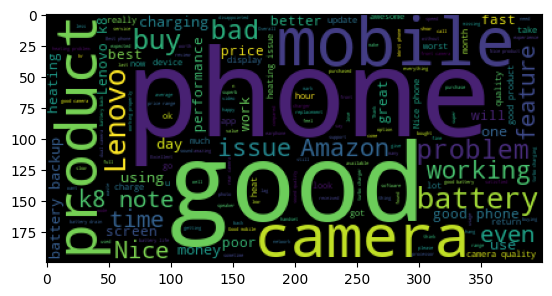

In [683]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [684]:
fdist.get("word0",32) #Return the value for key if key is in the dictionary, else default.

32

In [685]:
from nltk.probability import FreqDist
fdist = FreqDist(all_terms)
fdist

FreqDist({'.': 13052, 'is': 10392, ',': 6890, 'phone': 6723, 'the': 6559, 'not': 6068, 'good': 5853, 'it': 5506, 'and': 5488, 'i': 4748, ...})

In [686]:
stop_updated = stop_nltk + list(punctuation) + ["'s","..","...","...."]+["phone", "mobile","lenovo","k8","product", "amazon"]

In [687]:
stop_nltk = stopwords.words("english")
allterms1 = [word for word in all_terms if word not in stop_updated and len(word) >= 2]
len(set(allterms1))

17354

In [688]:
fdist = FreqDist(allterms1)
fdist

FreqDist({'good': 5853, 'battery': 3293, 'camera': 3250, "n't": 1858, 'nice': 1447, 'quality': 1386, 'problem': 1355, 'heating': 1305, 'note': 1260, 'buy': 1258, ...})

In [724]:
cleanrevstring = " ".join(allterms1)

In [725]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=50,random_state = 46333, stopwords = None,collocations = False).\
generate_from_text(cleanrevstring)

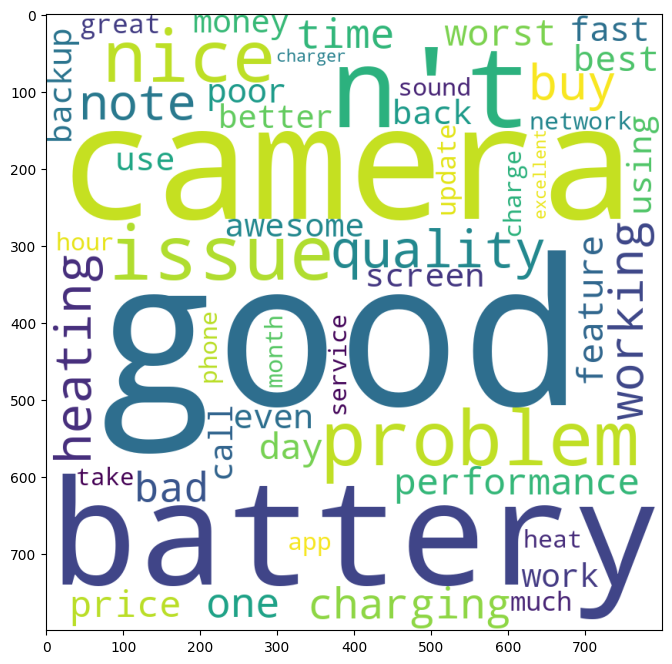

In [726]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [727]:
# Now stemming 
from nltk.stem import SnowballStemmer
stemmer_s = SnowballStemmer("english")

In [729]:
reviews_updated_stem = [stemmer_s.stem(word) for word in allterms1]

In [731]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
reviews_updated_lemm = [lemm.lemmatize(word,pos='v') for word in allterms1]

In [732]:
print(len(set(reviews_updated_stem)),len(set(reviews_updated_lemm)))
print(len((reviews_updated_stem)),len((reviews_updated_lemm)))

15032 15928
163954 163954


In [733]:
from nltk.corpus import wordnet
def notdrop(words):    
    new_words = []
    temp_word = ''
    for word in words:
        antonyms = []
        if word == 'not':
            temp_word = 'not_'
        elif temp_word == 'not_':
            for syn in wordnet.synsets(word):
                for s in syn.lemmas():
                    for a in s.antonyms():
                        antonyms.append(a.name())
            if len(antonyms) >= 1:
                word = antonyms[0]
            else:
                word = 'not ' + word
            temp_word = ''
        if word != 'not':
            new_words.append(word)

    return(new_words)

In [736]:
# Define function that takes in a raw string, returns a clean string
# - Tokenize, lower case, remove stop words, stem, stitch back to string
import re
def clean_txtstem(sent):
    sent = re.sub(r"\.",". ",sent)
    sent = re.sub(r"[^\w\s]+"," ",sent)
    tokens1 = word_tokenize(sent.lower())
    sent = re.sub("n't","not ",sent)
    #take care of negation
    tokens = notdrop(tokens1)
    stemmed = [stemmer_s.stem(term) for term in tokens if term not in stop_updated and len(term) > 1] 
    res = " ".join(stemmed)
    return res
# - Tokenize, lower case, remove stop words, lemma, stitch back to string
def clean_txtlemm(sent):
    sent = re.sub(r"\.",". ",sent)
    sent = re.sub(r"[^\w\s]+"," ",sent)
    tokens1 = word_tokenize(sent.lower())
    sent = re.sub("n't","not ",sent)
    #take care of negation
    tokens = notdrop(tokens1)
    stemmed = [lemm.lemmatize(term, pos = 'v')  for term in tokens if term not in stop_updated and len(term) > 1] 
    res = " ".join(stemmed)
    return res

In [737]:
%%time
reviews['clean_reviewstem'] = reviews.review.apply(clean_txtstem)

Wall time: 10.2 s


In [739]:
%%time
reviews['clean_reviewlemm'] = reviews.review.apply(clean_txtlemm)

Wall time: 4.34 s
Compiler : 139 ms


In [740]:
reviews

,sentiment,review,clean_reviewstem,clean_reviewlemm
0,1,Good but need updates and improvements,good need updat improv,good need update improvements
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,worst buy ever battery drain like hell backup ...
2,1,when I will get my 10% cash back.... its alrea...,get 10 cash back alreadi 15 januari,get 10 cash back already 15 january
3,1,Good,good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still not re...,worst everthey change last problem still not r...
...,...,...,...,...
14670,1,"I really like the phone, Everything is working...",realli like everyth work fine whater use,really like everything work fine whater use
14671,1,The Lenovo K8 Note is awesome. It takes best p...,note awesom take best pictur dual camera slim ...,note awesome take best picture dual camera sli...
14672,1,Awesome Gaget.. @ this price,awesom gaget price,awesome gaget price
14673,1,This phone is nice processing will be successf...,nice process success dual camera differ succes...,nice process successful dual camera differ suc...


## Sentiment Classification using VADER

In [743]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [744]:
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [746]:
reviews['score_vader'] = reviews.review.apply(get_vader_sentiment)
#Applying on raw data to also allow for weightages of smileys

In [747]:
reviews

,sentiment,review,clean_reviewstem,clean_reviewlemm,score_vader
0,1,Good but need updates and improvements,good need updat improv,good need update improvements,0.5994
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,worst buy ever battery drain like hell backup ...,-0.8720
2,1,when I will get my 10% cash back.... its alrea...,get 10 cash back alreadi 15 januari,get 10 cash back already 15 january,0.0000
3,1,Good,good,good,0.4404
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still not re...,worst everthey change last problem still not r...,-0.8289
...,...,...,...,...,...
14670,1,"I really like the phone, Everything is working...",realli like everyth work fine whater use,really like everything work fine whater use,0.5563
14671,1,The Lenovo K8 Note is awesome. It takes best p...,note awesom take best pictur dual camera slim ...,note awesome take best picture dual camera sli...,0.9337
14672,1,Awesome Gaget.. @ this price,awesom gaget price,awesome gaget price,0.6249
14673,1,This phone is nice processing will be successf...,nice process success dual camera differ succes...,nice process successful dual camera differ suc...,-0.0366


In [748]:
reviews['sent_prediction_vader'] = reviews.score_vader.apply(lambda x:1 if x>0.1 else 0)

In [749]:
reviews

,sentiment,review,clean_reviewstem,clean_reviewlemm,score_vader,sent_prediction_vader
0,1,Good but need updates and improvements,good need updat improv,good need update improvements,0.5994,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,worst buy ever battery drain like hell backup ...,-0.8720,0
2,1,when I will get my 10% cash back.... its alrea...,get 10 cash back alreadi 15 januari,get 10 cash back already 15 january,0.0000,0
3,1,Good,good,good,0.4404,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still not re...,worst everthey change last problem still not r...,-0.8289,0
...,...,...,...,...,...,...
14670,1,"I really like the phone, Everything is working...",realli like everyth work fine whater use,really like everything work fine whater use,0.5563,1
14671,1,The Lenovo K8 Note is awesome. It takes best p...,note awesom take best pictur dual camera slim ...,note awesome take best picture dual camera sli...,0.9337,1
14672,1,Awesome Gaget.. @ this price,awesom gaget price,awesome gaget price,0.6249,1
14673,1,This phone is nice processing will be successf...,nice process success dual camera differ succes...,nice process successful dual camera differ suc...,-0.0366,0


In [750]:
accuracy_score(reviews.sentiment,reviews.sent_prediction_vader)

0.7894378194207836

In [751]:
confusion_matrix(reviews.sentiment,reviews.sent_prediction_vader)

array([[5855, 1857],
       [1233, 5730]], dtype=int64)

### Examples of Sentiment analysis (vader)

In [752]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [753]:
analyser = SentimentIntensityAnalyzer()

In [754]:
analyser.polarity_scores("this food is great and amazing and best")

{'neg': 0.0, 'neu': 0.292, 'pos': 0.708, 'compound': 0.9201}

In [755]:
analyser.polarity_scores("this food is GREAT and amazing and best. :)")

{'neg': 0.0, 'neu': 0.24, 'pos': 0.76, 'compound': 0.9504}

In [756]:
analyser.polarity_scores("just heard the news :) :@")['compound']

-0.128

In [757]:
analyser.polarity_scores("just heard the news :) :@")

{'neg': 0.333, 'neu': 0.381, 'pos': 0.286, 'compound': -0.128}

In [758]:
# Sum of Neg + neu + pos =1

### Converting Text To numbers

In [759]:
import numpy as np
import pandas as pd
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [760]:
doc1 = "Text Analytics is boring boring boring!!"
doc2 = "Analytics is interesting"
doc3 = "We want sports analytics"

In [761]:
stop_updated = stopwords.words("english") + list(punctuation) 
def clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    final_word = [term for term in tokens if term not in stop_updated 
               and len(term) > 2] 
    res = " ".join(final_word)
    return res

In [762]:
doc1_clean = clean_txt(doc1)
doc1_clean

'text analytics boring boring boring'

In [763]:
doc2_clean = clean_txt(doc2)
doc2_clean

'analytics interesting'

In [764]:
doc3_clean = clean_txt(doc3)
doc3_clean

'want sports analytics'

In [765]:
doc = pd.DataFrame([doc1_clean, doc2_clean, doc3_clean], columns=["text"])
doc

,text
0,text analytics boring boring boring
1,analytics interesting
2,want sports analytics


In [767]:
#CountVectorizer of sklearn gives us the DTM
from sklearn.feature_extraction.text import CountVectorizer
#Instantiating CountVectorizer
count_vect = CountVectorizer(ngram_range =(1,1))
#Invoking fit_transoform on the CountVectorizer object
X = count_vect.fit_transform(doc['text'])
X.toarray()
# Words are rranged alphabetic wise

array([[1, 3, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 1]], dtype=int64)

- fit -> extract distinct words to form a bag of words (BoW)
- transform -> compute the occourrence of every word from the BOW in each document

In [768]:
#Obtaining the BOW's
bow = count_vect.get_feature_names()
bow

d:\work\mining\mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['analytics', 'boring', 'interesting', 'sports', 'text', 'want']

In [769]:
#Get the position of every word in the BOW, as a dictionary
print(count_vect.vocabulary_)

{'text': 4, 'analytics': 0, 'boring': 1, 'interesting': 2, 'want': 5, 'sports': 3}


In [771]:
DTM = pd.DataFrame(X.toarray(),columns = bow)
DTM

,analytics,boring,interesting,sports,text,want
0,1,3,0,0,1,0
1,1,0,1,0,0,0
2,1,0,0,1,0,1


In [772]:
#Term document matrix or TDM is a transpose of DTM 
#which is used in finding similarity between words
TDM = DTM.T
TDM

,0,1,2
analytics,1,1,1
boring,3,0,0
interesting,0,1,0
sports,0,0,1
text,1,0,0
want,0,0,1


### ngram analysis
- unigram -> a token comprises of a exactly a single word
- bigram -> a token comprises of exactly two words
- trigram -> a token comprises of eaxctly three words

#### The next immediate word(s) are grouped with the current word to form a bigram or a tri-gram
- For example: suppose we have a string " how are you doing"
- unigram :{"how", "are", "you", "doing"}
- bigram: {"how are", "are you", "you doing"}
- trigram:{"how are you", "are you doing"}

### Any combination of unigrams, bigrams and trigrams can be obtained using a Countvectorizer

- By default the vectorizer's in sklearn will perform on unigrams, i.e ngram_range will be set to (1,1)
- to extarct bigrams ngram_range = (2,2)
- to extract trigrams ngram_range = (3,3)
- To extract both unigrams and bigrams ngram_range = (1,2)

In [776]:
# A token is called as a bigram if its min and max length is 2
count_vect_bg = CountVectorizer(ngram_range=(2,2))
X_bg = count_vect_bg.fit_transform(doc['text'])
print(count_vect_bg.get_feature_names())

['analytics boring', 'analytics interesting', 'boring boring', 'sports analytics', 'text analytics', 'want sports']


d:\work\mining\mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [777]:
DTM_bg = pd.DataFrame(X_bg.toarray(),columns=count_vect_bg.get_feature_names())
DTM_bg

,analytics boring,analytics interesting,boring boring,sports analytics,text analytics,want sports
0,1,0,2,0,1,0
1,0,1,0,0,0,0
2,0,0,0,1,0,1


##### Setting max features
 
 1. your vectorizer's take another argument called max_features where in you can specify the top n features to be selected
 2. on your DTM, if you perfrom column sum, you will get the total No. of occourrence of a word accross all the documents

### TFIDF

In [778]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1,1))
X = tfidf_vect.fit_transform(doc['text'])
X.todense()

matrix([[0.18359452, 0.93255764, 0.        , 0.        , 0.31085255,
         0.        ],
        [0.50854232, 0.        , 0.861037  , 0.        , 0.        ,
         0.        ],
        [0.38537163, 0.        , 0.        , 0.65249088, 0.        ,
         0.65249088]])

In [780]:
tfidf = pd.DataFrame(X.toarray(), columns=tfidf_vect.get_feature_names())
tfidf
# each row is Unit vector

d:\work\mining\mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,analytics,boring,interesting,sports,text,want
0,0.183595,0.932558,0.000000,0.000000,0.310853,0.000000
1,0.508542,0.000000,0.861037,0.000000,0.000000,0.000000
2,0.385372,0.000000,0.000000,0.652491,0.000000,0.652491


### Cosine Similarity

In [787]:
from sklearn.metrics.pairwise import cosine_similarity
cs = cosine_similarity(TDM) # here we are using the Transpose of DTM
print(cs)

[[1.         0.57735027 0.57735027 0.57735027 0.57735027 0.57735027]
 [0.57735027 1.         0.         0.         1.         0.        ]
 [0.57735027 0.         1.         0.         0.         0.        ]
 [0.57735027 0.         0.         1.         0.         1.        ]
 [0.57735027 1.         0.         0.         1.         0.        ]
 [0.57735027 0.         0.         1.         0.         1.        ]]


In [788]:
cs_words = cosine_similarity(DTM.T)

In [789]:
sim_mat = pd.DataFrame(cs_words,columns=DTM.columns,index=DTM.columns)
sim_mat

,analytics,boring,interesting,sports,text,want
analytics,1.00000,0.57735,0.57735,0.57735,0.57735,0.57735
boring,0.57735,1.00000,0.00000,0.00000,1.00000,0.00000
interesting,0.57735,0.00000,1.00000,0.00000,0.00000,0.00000
sports,0.57735,0.00000,0.00000,1.00000,0.00000,1.00000
text,0.57735,1.00000,0.00000,0.00000,1.00000,0.00000
want,0.57735,0.00000,0.00000,1.00000,0.00000,1.00000
